In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Looking if have some null values

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Cleaning the null values

In [3]:
data.dropna(inplace=True) # remove line or column that don't have value (NaN) 

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Creating the training models

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value','ocean_proximity'], axis=1)
y = data['median_house_value']

## test datas and test datas

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5171,-118.28,33.94,38.0,637.0,204.0,679.0,162.0,1.5714,89700.0
12459,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
8873,-118.41,34.07,47.0,2979.0,626.0,1076.0,571.0,3.9904,500001.0
17154,-122.21,37.43,23.0,5741.0,1012.0,1843.0,888.0,5.7211,500001.0
16463,-121.28,38.11,10.0,2974.0,588.0,1559.0,568.0,3.8825,136800.0
...,...,...,...,...,...,...,...,...,...
14634,-117.20,32.80,33.0,2573.0,436.0,1084.0,443.0,4.2417,294100.0
13805,-117.03,34.91,27.0,2718.0,583.0,1472.0,509.0,2.8250,76600.0
10905,-117.86,33.76,15.0,851.0,297.0,1326.0,254.0,2.8289,117500.0
15295,-117.34,33.16,24.0,1006.0,277.0,610.0,246.0,2.2500,187500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

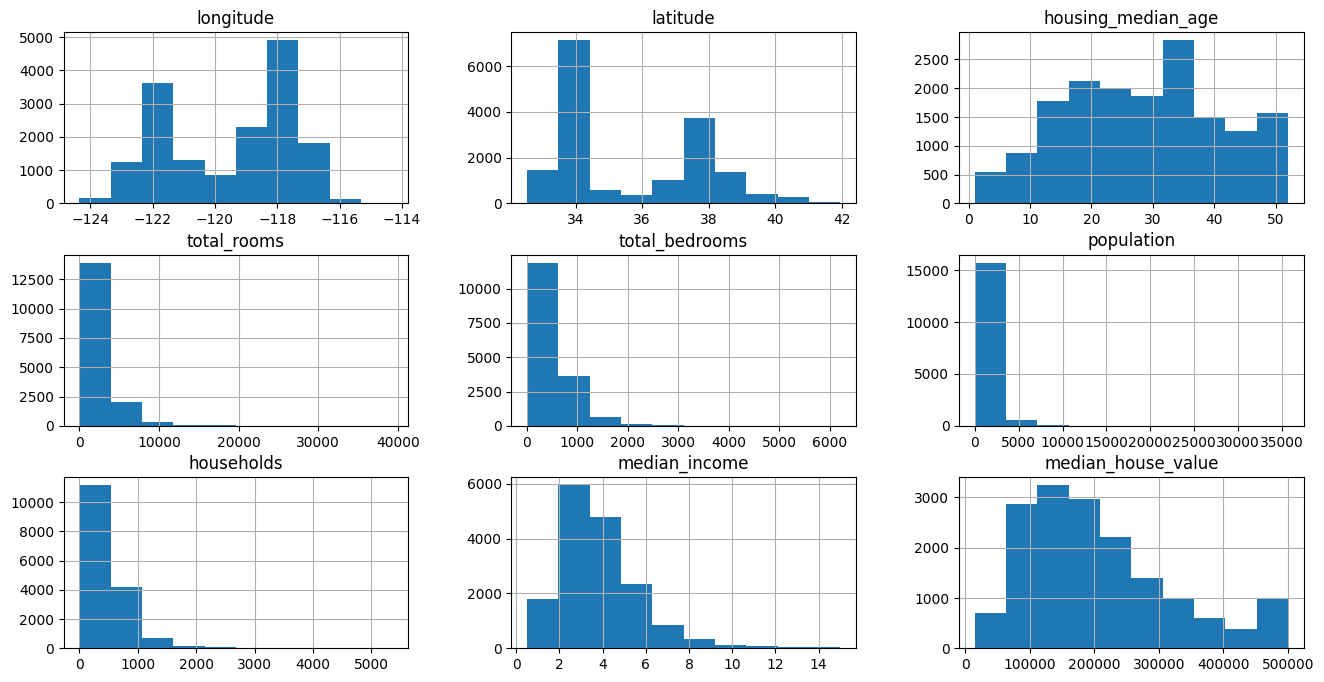

In [7]:
train_data.hist(figsize=(16,8))

<Axes: >

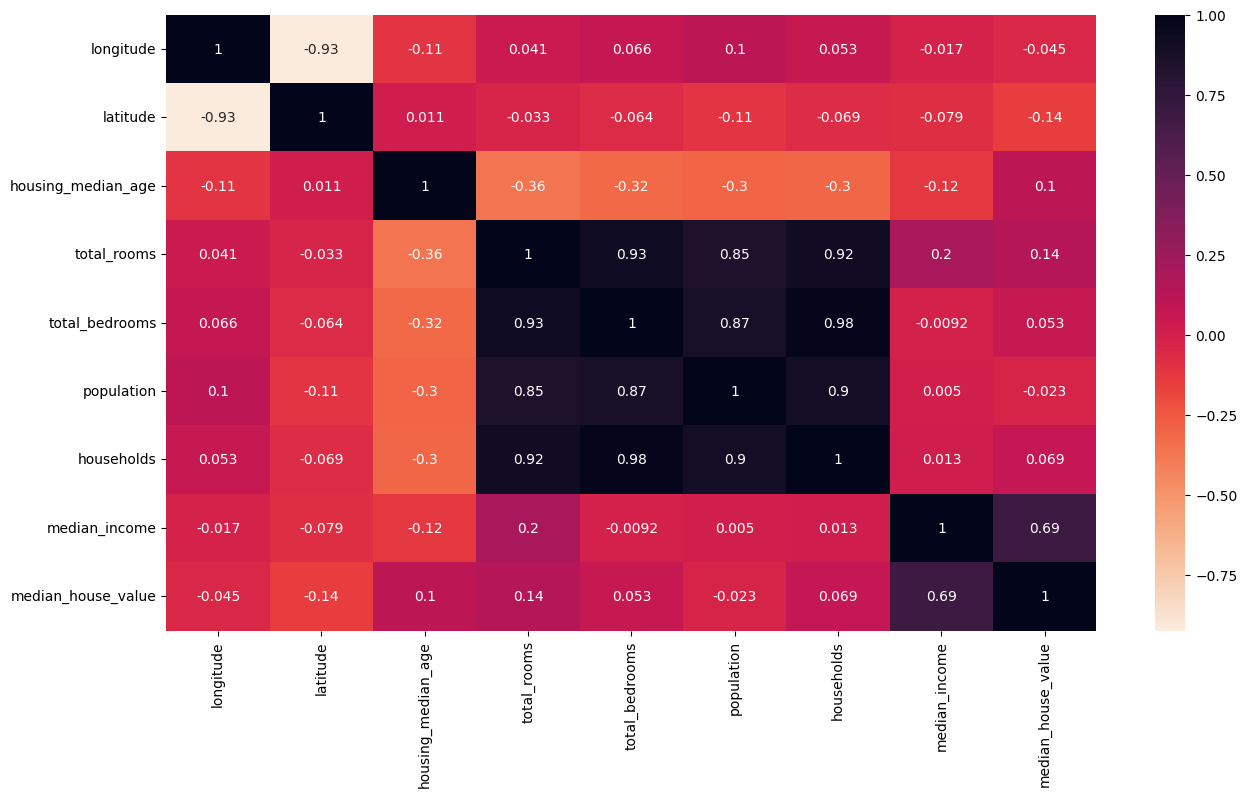

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="rocket_r")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

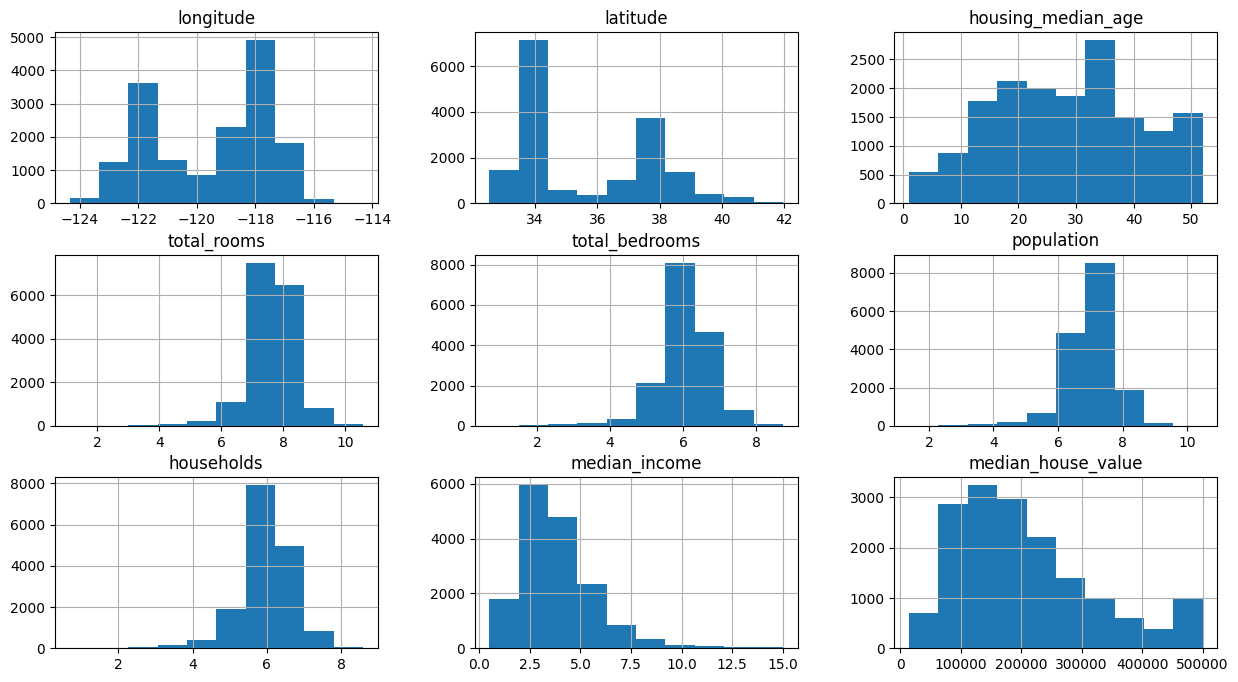

In [9]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)



train_data.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

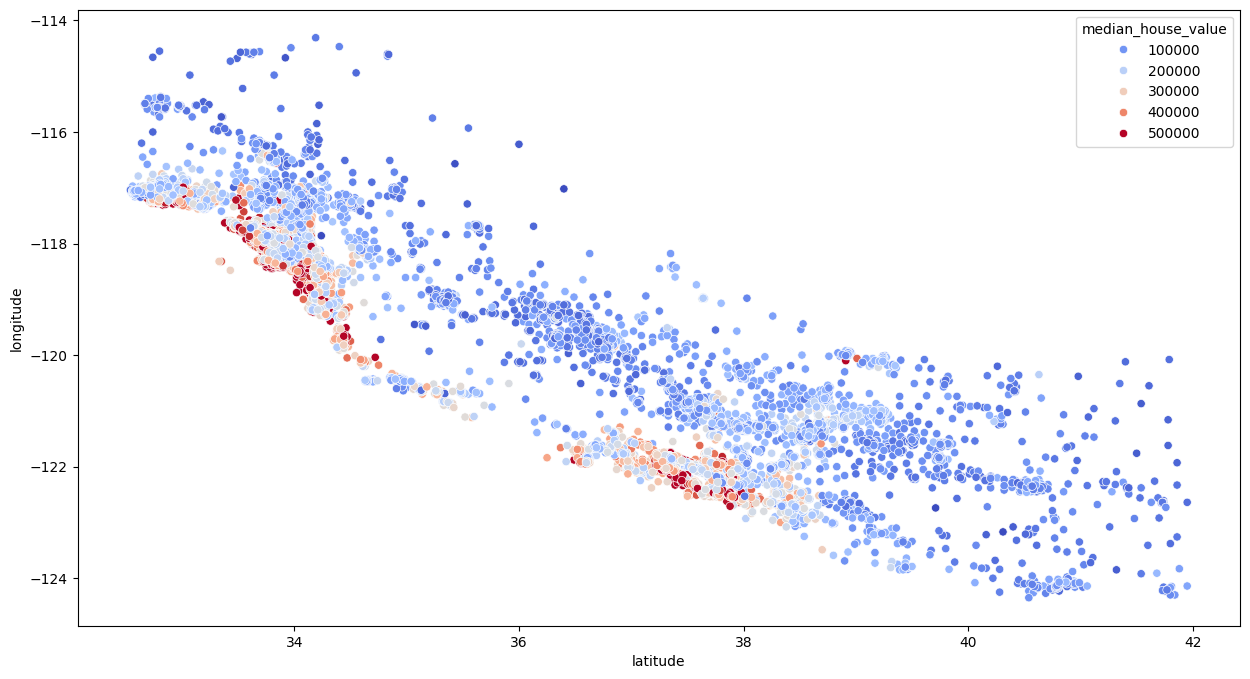

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<Axes: >

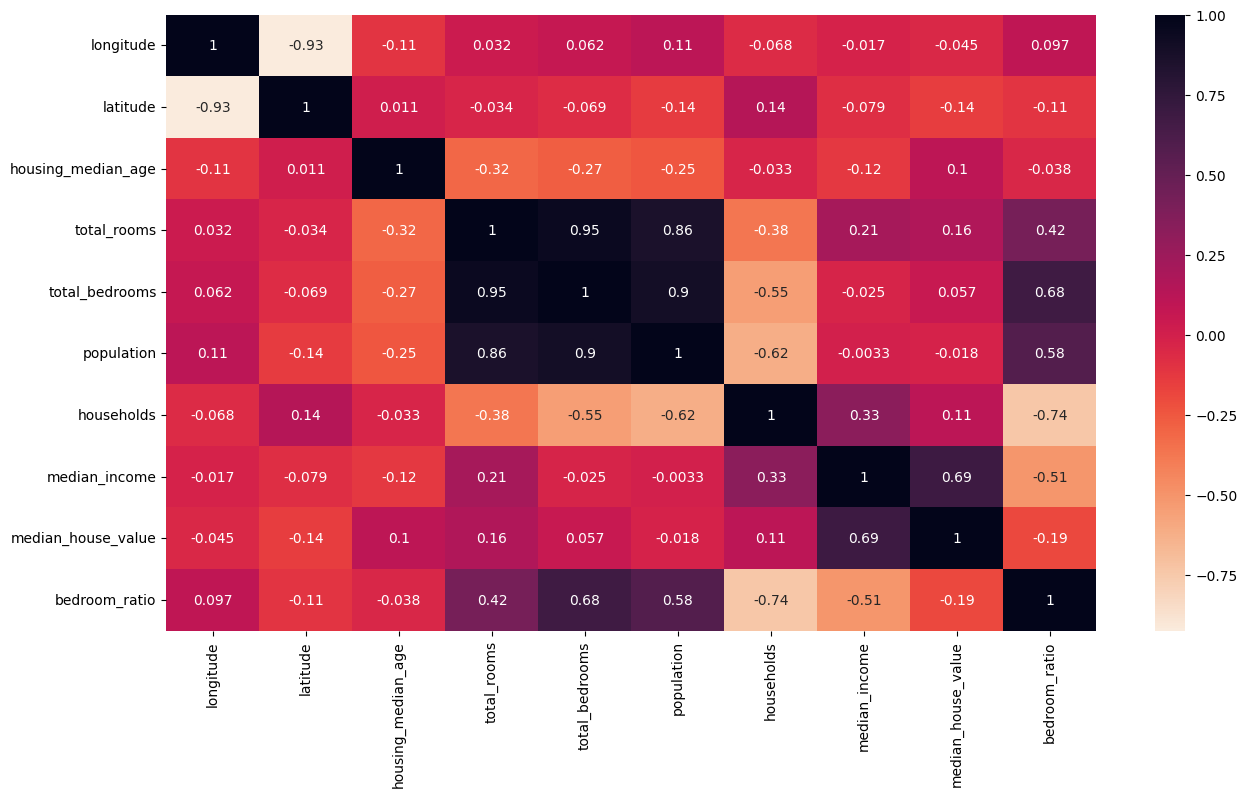

In [11]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households'] = train_data['total_rooms'] / train_data['households']

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="rocket_r")

## Using the machine learning to linear regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

## Test

In [13]:
test_data = X_test.join(y_test)


test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households'] = test_data['total_rooms'] / test_data['households']

In [14]:
X_test, y_test = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

In [15]:
X_test_s = scaler.transform(X_test)

In [16]:
reg.score(X_train_s, y_test)

0.6634491074375302

## Using other better model

In [17]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(X_test_s, y_train)

forest.score(X_test_s, y_test)

0.9722146292865971

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators" : [3, 10, 30],
    "max_features" : [2, 4, 6, 8]
}

grid_search = GridSearchCV(
    forest, param_grid, cv=5,
    scoring="neg_mean_squared_error",
    return_train_score= True
)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [19]:
best_forest = grid_search.best_estimator_

In [20]:
best_forest.score(X_test_s, y_test)

0.9701098591707558